<h1>Проект<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#calls" data-toc-modified-id="calls-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>calls</a></span></li><li><span><a href="#internet" data-toc-modified-id="internet-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>internet</a></span></li><li><span><a href="#messages" data-toc-modified-id="messages-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>messages</a></span></li><li><span><a href="#tariffs" data-toc-modified-id="tariffs-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>tariffs</a></span></li><li><span><a href="#users" data-toc-modified-id="users-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>users</a></span></li><li><span><a href="#Преобразование-типов" data-toc-modified-id="Преобразование-типов-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Преобразование типов</a></span></li><li><span><a href="#Количество-трафика-по-месяцам" data-toc-modified-id="Количество-трафика-по-месяцам-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Количество трафика по месяцам</a></span></li><li><span><a href="#Помесячная-выручка-с-каждого-пользователя:" data-toc-modified-id="Помесячная-выручка-с-каждого-пользователя:-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Помесячная выручка с каждого пользователя:</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-1" data-toc-modified-id="Гипотеза-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Гипотеза 1</a></span></li><li><span><a href="#Гипотеза-2" data-toc-modified-id="Гипотеза-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Гипотеза 2</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

Проведем предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей *Мегалайна*: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Проанализируем данные и сделаем вывод — какой тариф лучше (приносит больше денег бизнесу).


## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.float_format', '{:,.2f}'.format) #при выводе describe задаем количество нужных знаков

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

### calls

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропусков не обнаружено.

In [4]:
calls.describe(exclude=[np.number])

,id,call_date
count,202607,202607
unique,202607,365
top,1344_764,2018-12-31
freq,1,1435


In [5]:
calls.describe()

,duration,user_id
count,"202,607.00","202,607.00"
mean,6.76,"1,253.94"
std,5.84,144.72
min,0.00,"1,000.00"
25%,1.30,"1,126.00"
50%,6.00,"1,260.00"
75%,10.70,"1,379.00"
max,38.00,"1,499.00"


In [6]:
calls.sample(n=5, random_state=42)

,id,call_date,duration,user_id
158741,1392_406,2018-07-09,4.94,1392
95947,1244_202,2018-11-09,0.00,1244
10624,1027_494,2018-10-07,3.10,1027
167423,1412_340,2018-09-25,5.91,1412
73194,1184_168,2018-09-03,9.86,1184


### internet

In [7]:
internet.head(3)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000


In [8]:
internet.columns

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

Присутствует странный столбец, дублирующий индексы, исправим это:

In [9]:
internet = internet.drop(columns=['Unnamed: 0'])
internet.sample(n=5, random_state=42)

,id,mb_used,session_date,user_id
31737,1110_331,351.71,2018-09-04,1110
31333,1109_399,257.69,2018-06-09,1109
61121,1207_191,128.18,2018-11-05,1207
71184,1241_88,736.71,2018-11-23,1241
84394,1286_76,900.69,2018-12-18,1286


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


Категориальные переменные:

In [11]:
internet.describe(exclude=[np.number])

,id,session_date
count,149396,149396
unique,149396,365
top,1372_60,2018-12-31
freq,1,1057


In [12]:
internet.describe()

,mb_used,user_id
count,"149,396.00","149,396.00"
mean,370.19,"1,252.10"
std,278.30,144.05
min,0.00,"1,000.00"
25%,138.19,"1,130.00"
50%,348.01,"1,251.00"
75%,559.55,"1,380.00"
max,"1,724.83","1,499.00"


### messages

In [13]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [14]:
messages.describe(include='all')

,id,message_date,user_id
count,123036,123036,"123,036.00"
unique,123036,364,nan
top,1411_502,2018-12-31,nan
freq,1,859,nan
mean,NaN,NaN,"1,256.99"
std,NaN,NaN,143.52
min,NaN,NaN,"1,000.00"
25%,NaN,NaN,"1,134.00"
50%,NaN,NaN,"1,271.00"
75%,NaN,NaN,"1,381.00"


In [15]:
messages.sample(n=5, random_state=42)

,id,message_date,user_id
8581,1033_332,2018-11-08,1033
12476,1054_32,2018-08-10,1054
14805,1065_141,2018-05-29,1065
118278,1481_49,2018-05-24,1481
23803,1099_10,2018-08-24,1099


### tariffs

In [16]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [17]:
tariffs['mb_per_month_included'] = (tariffs['mb_per_month_included'] / 1024).apply(np.ceil)
tariffs = tariffs.rename(columns={'mb_per_month_included':'gb_per_month_included'})
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.00,500,550,200,3,3,smart
1,1000,30.00,3000,1950,150,1,1,ultra


In [18]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

### users

In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Видны пропуски в столбце `churn_date`, скорее всего данные люди до сих пор пользуются данным тарифом $\Rightarrow$ у них нет даты прекращения пользования.

Посмотрим на распределение количества отказов за 1 день:

In [20]:
churn_count = users.churn_date.value_counts()
churn_count.groupby(churn_count).count()

churn_date
1    28
2     5
Name: churn_date, dtype: int64

Так как отказавшихся клиентов довольно мало и количество отказов в день не превышает 2, то можно преобразовать столбец `churn_date` в булев столбец "отказ-не отказ".

In [21]:
users['churn_date'] = users['churn_date'].where(users['churn_date'].isna(), 1)
users['churn_date'] = users['churn_date'].fillna(0)

In [22]:
users['churn_date'] = users['churn_date'].astype('bool')
users['churn_date'].head()

0    False
1    False
2    False
3    False
4    False
Name: churn_date, dtype: bool

In [23]:
users = users.rename(columns={'churn_date': 'is_churned'})
users.columns

Index(['user_id', 'age', 'is_churned', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

In [24]:
users.describe()

,user_id,age
count,500.00,500.00
mean,"1,249.50",46.59
std,144.48,16.67
min,"1,000.00",18.00
25%,"1,124.75",32.00
50%,"1,249.50",46.00
75%,"1,374.25",62.00
max,"1,499.00",75.00


In [25]:
users.describe(exclude=[np.number])

,is_churned,city,first_name,last_name,reg_date,tariff
count,500,500,500,500,500,500
unique,2,76,246,419,270,2
top,False,Москва,Радим,Андреенко,2018-05-28,smart
freq,462,99,6,5,8,351


Видно, что:
- тарифом *smart* пользуется в 2.3 раза больше людей, чем тарифом *ultra*.
- на Москву приходится 20% пользователей сети.

In [26]:
users.sample(n=5, random_state=42)

,user_id,age,is_churned,city,first_name,last_name,reg_date,tariff
361,1361,38,False,Екатеринбург,Рената,Кошелева,2018-09-09,ultra
73,1073,63,False,Владикавказ,Гордей,Павловский,2018-10-04,smart
374,1374,67,False,Махачкала,Леонид,Аркадьев,2018-04-01,smart
155,1155,71,False,Ставрополь,Александр,Чернов,2018-01-02,smart
104,1104,60,False,Нижний Тагил,Габриэль,Поляков,2018-02-21,ultra


### Преобразование типов

Переведем даты в тип *date_time*:

In [27]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

А также переведем `user_id` в тип object:

In [28]:
calls['user_id'] = calls['user_id'].astype('object')
internet['user_id'] = internet['user_id'].astype('object')
messages['user_id'] = messages['user_id'].astype('object')
users['user_id'] = users['user_id'].astype('object')

### Количество трафика по месяцам

Количество сделанных звонков и израсходованных минут разговора по месяцам (с округлением минут):

In [29]:
calls['call_month'] = calls['call_date'].dt.month
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')
calls.head()

,id,call_date,duration,user_id,call_month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [30]:
pivot_calls = calls.pivot_table(index=['call_month', 'user_id'],
                  values=['id', 'duration'], aggfunc={'id':'count', 'duration':'sum'})
pivot_calls.columns = ['mins_per_month', 'number_of_calls']
pivot_calls = pivot_calls.rename_axis(['month', 'user_id'])
pivot_calls.head() 

mins_per_month  number_of_calls
month user_id                                 
1     1005                 95               15
      1032                380               61
      1045                  9                1
      1055                551               64
      1071                194               24

Количество отправленных сообщений по месяцам для каждого пользователя:

In [31]:
messages['message_month'] = messages['message_date'].dt.month
messages.head()

,id,message_date,user_id,message_month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [32]:
pivot_messages = messages.pivot_table(index=['message_month', 'user_id'],
                  values='id', aggfunc='count')
pivot_messages.columns = ['messages_per_month']
pivot_messages = pivot_messages.rename_axis(['month', 'user_id'])
pivot_messages.loc[1,:].head() #1st month

,messages_per_month
user_id,
1005,7
1032,38
1045,5
1055,30
1071,16


Объем израсходованного интернет-трафика по месяцам (переведем мегабайты в гигабайты):

In [33]:
internet['session_month'] = internet['session_date'].dt.month
internet['mb_used'] = internet['mb_used'] / 1024
internet = internet.rename(columns={'mb_used':'gb_used'})
internet.head()

,id,gb_used,session_date,user_id,session_month
0,1000_0,0.11,2018-11-25,1000,11
1,1000_1,1.03,2018-09-07,1000,9
2,1000_2,1.17,2018-06-25,1000,6
3,1000_3,0.54,2018-08-22,1000,8
4,1000_4,0.30,2018-09-24,1000,9


Округлим гигабайты за месяц:

In [34]:
pivot_internet = internet.pivot_table(index=['session_month', 'user_id'],
                  values='gb_used', aggfunc='sum')
pivot_internet.columns = ['gb_per_month']
pivot_internet = pivot_internet.rename_axis(['month', 'user_id'])
pivot_internet = pivot_internet.apply(np.ceil) #округлили
pivot_internet.loc[1:].head() #1st month

gb_per_month
month user_id              
1     1005             3.00
      1032            24.00
      1045             3.00
      1055            17.00
      1071            16.00

### Помесячная выручка с каждого пользователя:

In [35]:
users_info = users.merge(tariffs, on='tariff', how='left')
users_info['month'] = 1
users_info.head()

,user_id,age,is_churned,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month
0,1000,52,False,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.00,3000,1950,150,1,1,1
1,1001,41,False,Москва,Иван,Ежов,2018-11-01,smart,50,15.00,500,550,200,3,3,1
2,1002,59,False,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15.00,500,550,200,3,3,1
3,1003,23,False,Москва,Белла,Белякова,2018-08-17,ultra,1000,30.00,3000,1950,150,1,1,1
4,1004,68,False,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30.00,3000,1950,150,1,1,1


In [36]:
users_info.shape

(500, 16)

In [37]:
df = users_info.copy()
users_info_ = users_info.copy()
for i in range(1, 12):
    users_info_['month'] = i+1
    df = pd.concat([df, users_info_], ignore_index=True)
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [38]:
df.shape

(6000, 16)

In [39]:
users_info = df.set_index(['month', 'user_id'])
users_info

age  is_churned         city first_name  last_name   reg_date  \
month user_id                                                                  
1     1000      52       False    Краснодар     Рафаил  Верещагин 2018-05-25   
      1001      41       False       Москва       Иван       Ежов 2018-11-01   
      1002      59       False  Стерлитамак    Евгений  Абрамович 2018-06-17   
      1003      23       False       Москва      Белла   Белякова 2018-08-17   
      1004      68       False  Новокузнецк    Татьяна   Авдеенко 2018-05-14   
...            ...         ...          ...        ...        ...        ...   
12    1495      65       False      Иркутск  Авксентий      Фокин 2018-08-28   
      1496      36       False      Вологда     Трифон     Блохин 2018-01-27   
      1497      32       False    Челябинск   Каролина     Агеева 2018-10-09   
      1498      68        True  Владикавказ   Всеволод    Акимчин 2018-07-19   
      1499      35       False        Пермь     Гектор   Корнилов 2018-09-27   

              tariff  messages_included  gb_per_month_included  \
month user_id                                                    
1     1000     ultra               1000                  30.00   
      1001     smart                 50                  15.00   
      1002     smart                 50                  15.00   
      1003     ultra               1000                  30.00   
      1004     ultra               1000                  30.00   
...              ...                ...                    ...   
12    1495     ultra               1000                  30.00   
      1496     smart                 50                  15.00   
      1497     smart                 50                  15.00   
      1498     smart                 50                  15.00   
      1499     smart                 50                  15.00   

               minutes_included  rub_monthly_fee  rub_per_gb  rub_per_message  \
month user_id                                                                   
1     1000                 3000             1950         150                1   
      1001                  500              550         200                3   
      1002                  500              550         200                3   
      1003                 3000             1950         150                1   
      1004                 3000             1950         150                1   
...                         ...              ...         ...              ...   
12    1495                 3000             1950         150                1   
      1496                  500              550         200                3   
      1497                  500              550         200                3   
      1498                  500              550         200                3   
      1499                  500              550         200                3   

               rub_per_minute  
month user_id                  
1     1000                  1  
      1001                  3  
      1002                  3  
      1003                  1  
      1004                  1  
...                       ...  
12    1495                  1  
      1496                  3  
      1497                  3  
      1498                  3  
      1499                  3  

[6000 rows x 14 columns]

Объединим помесячную сводку для пользователей:

In [40]:
pivot_df = pivot_calls.join(pivot_internet)
pivot_df = pivot_df.join(pivot_messages)
pivot_df = pivot_df.drop(columns=['number_of_calls'])
pivot_df

mins_per_month  gb_per_month  messages_per_month
month user_id                                                  
1     1005                 95          3.00                7.00
      1032                380         24.00               38.00
      1045                  9          3.00                5.00
      1055                551         17.00               30.00
      1071                194         16.00               16.00
...                       ...           ...                 ...
12    1494                418         18.00                 nan
      1495               1031         23.00               84.00
      1496                518         21.00               51.00
      1497                545         20.00               17.00
      1499                492         13.00               66.00

[3174 rows x 3 columns]

Сводка по месяцам для каждого пользователя:

In [41]:
df = pivot_df.join(users_info)
df

mins_per_month  gb_per_month  messages_per_month  age  \
month user_id                                                          
1     1005                 95          3.00                7.00   67   
      1032                380         24.00               38.00   31   
      1045                  9          3.00                5.00   48   
      1055                551         17.00               30.00   39   
      1071                194         16.00               16.00   20   
...                       ...           ...                 ...  ...   
12    1494                418         18.00                 nan   62   
      1495               1031         23.00               84.00   65   
      1496                518         21.00               51.00   36   
      1497                545         20.00               17.00   32   
      1499                492         13.00               66.00   35   

               is_churned              city first_name  last_name   reg_date  \
month user_id                                                                  
1     1005          False  Набережные Челны   Афанасий     Горлов 2018-01-25   
      1032          False         Ульяновск       Инна  Игнатьева 2018-01-04   
      1045          False          Улан-Удэ     Джемма   Карасева 2018-01-30   
      1055          False            Казань      Луиза   Березина 2018-01-02   
      1071           True              Омск     Гектор    Чумаков 2018-01-09   
...                   ...               ...        ...        ...        ...   
12    1494          False              Омск      Ренат   Андропов 2018-08-17   
      1495          False           Иркутск  Авксентий      Фокин 2018-08-28   
      1496          False           Вологда     Трифон     Блохин 2018-01-27   
      1497          False         Челябинск   Каролина     Агеева 2018-10-09   
      1499          False             Пермь     Гектор   Корнилов 2018-09-27   

              tariff  messages_included  gb_per_month_included  \
month user_id                                                    
1     1005     smart                 50                  15.00   
      1032     smart                 50                  15.00   
      1045     smart                 50                  15.00   
      1055     smart                 50                  15.00   
      1071     smart                 50                  15.00   
...              ...                ...                    ...   
12    1494     smart                 50                  15.00   
      1495     ultra               1000                  30.00   
      1496     smart                 50                  15.00   
      1497     smart                 50                  15.00   
      1499     smart                 50                  15.00   

               minutes_included  rub_monthly_fee  rub_per_gb  rub_per_message  \
month user_id                                                                   
1     1005                  500              550         200                3   
      1032                  500              550         200                3   
      1045                  500              550         200                3   
      1055                  500              550         200                3   
      1071                  500              550         200                3   
...                         ...              ...         ...              ...   
12    1494                  500              550         200                3   
      1495                 3000             1950         150                1   
      1496                  500              550         200                3   
      1497                  500              550         200                3   
      1499                  500              550         200                3   

               rub_per_minute  
month user_id                  
1     1005                  3  
      1032                  

Посчитаем теперь прибыль с каждого пользователя:

In [42]:
def income_count(row):
    rub_monthly_fee = row['rub_monthly_fee']
    mins_income, internet_income, messages_income = 0, 0, 0
    
    minutes_included = row['minutes_included']
    mins_per_month = row['mins_per_month']
    rub_per_minute = row['rub_per_minute']
    
    gb_per_month = row['gb_per_month']
    gb_per_month_included = row['gb_per_month_included']
    rub_per_gb = row['rub_per_gb']
    
    messages_per_month = row['messages_per_month']
    messages_included = row['messages_included']
    rub_per_message = row['rub_per_message']
    
    if mins_per_month > minutes_included:
        mins_income = (mins_per_month - minutes_included) * rub_per_minute
    if gb_per_month > gb_per_month_included:
        internet_income = (gb_per_month - gb_per_month_included) * rub_per_gb
    if messages_per_month > messages_included:
        messages_income = (messages_per_month - messages_included) * rub_per_message
    
    return rub_monthly_fee + mins_income + internet_income + messages_income

In [43]:
df['income'] = df.apply(income_count, axis=1)
df

mins_per_month  gb_per_month  messages_per_month  age  \
month user_id                                                          
1     1005                 95          3.00                7.00   67   
      1032                380         24.00               38.00   31   
      1045                  9          3.00                5.00   48   
      1055                551         17.00               30.00   39   
      1071                194         16.00               16.00   20   
...                       ...           ...                 ...  ...   
12    1494                418         18.00                 nan   62   
      1495               1031         23.00               84.00   65   
      1496                518         21.00               51.00   36   
      1497                545         20.00               17.00   32   
      1499                492         13.00               66.00   35   

               is_churned              city first_name  last_name   reg_date  \
month user_id                                                                  
1     1005          False  Набережные Челны   Афанасий     Горлов 2018-01-25   
      1032          False         Ульяновск       Инна  Игнатьева 2018-01-04   
      1045          False          Улан-Удэ     Джемма   Карасева 2018-01-30   
      1055          False            Казань      Луиза   Березина 2018-01-02   
      1071           True              Омск     Гектор    Чумаков 2018-01-09   
...                   ...               ...        ...        ...        ...   
12    1494          False              Омск      Ренат   Андропов 2018-08-17   
      1495          False           Иркутск  Авксентий      Фокин 2018-08-28   
      1496          False           Вологда     Трифон     Блохин 2018-01-27   
      1497          False         Челябинск   Каролина     Агеева 2018-10-09   
      1499          False             Пермь     Гектор   Корнилов 2018-09-27   

              tariff  messages_included  gb_per_month_included  \
month user_id                                                    
1     1005     smart                 50                  15.00   
      1032     smart                 50                  15.00   
      1045     smart                 50                  15.00   
      1055     smart                 50                  15.00   
      1071     smart                 50                  15.00   
...              ...                ...                    ...   
12    1494     smart                 50                  15.00   
      1495     ultra               1000                  30.00   
      1496     smart                 50                  15.00   
      1497     smart                 50                  15.00   
      1499     smart                 50                  15.00   

               minutes_included  rub_monthly_fee  rub_per_gb  rub_per_message  \
month user_id                                                                   
1     1005                  500              550         200                3   
      1032                  500              550         200                3   
      1045                  500              550         200                3   
      1055                  500              550         200                3   
      1071                  500              550         200                3   
...                         ...              ...         ...              ...   
12    1494                  500              550         200                3   
      1495                 3000             1950         150                1   
      1496                  500              550         200                3   
      1497                  500              550         200                3   
      1499                  500              550         200                3   

               rub_per_minute   income  
month user_id                           
1     1005                  3   550.00  
 

### Вывод:

- Пропусков не обнаружено нигде, кроме датафрема `users` в столбце `churn_date`, но они обусловлены тем, что пользователи всё еще пользуются услугами оператора. Столбец заменен на булев тип и переименован в `is_churned`.
- В табличке `internet` был лишний столбец индексов.
- Были изменены типы данных, а также округлены значения минут разговора, количества использованных гигабайт, где это необходимо.

## Анализ данных

Разделим пользователей на две группы в зависимости от тарифа:

In [44]:
df_smart = df.query('tariff == "smart"')
df_ultra = df.query('tariff == "ultra"')

Найдем среднее количество, дисперсию и стандартное отклонение для минут разговора, сообщений и потраченных гигабайт:

Минуты по месяцам для тарифа смарт:

In [45]:
for i in range(1, 13):
    smart_mean_mins = df_smart.loc[i, 'mins_per_month'].mean()
    smart_var_mins = df_smart.loc[i, 'mins_per_month'].var(ddof=1)
    smart_std_mins = df_smart.loc[i, 'mins_per_month'].std(ddof=1)
    print(f'Среднее, дисперсия и стандартное отклонение для {i:2} месяца: {smart_mean_mins:.5f}  {smart_var_mins:.5f}  {smart_std_mins:.5f}')


Среднее, дисперсия и стандартное отклонение для  1 месяца: 203.85294  23787.34135  154.23145
Среднее, дисперсия и стандартное отклонение для  2 месяца: 298.68966  36412.28796  190.82004
Среднее, дисперсия и стандартное отклонение для  3 месяца: 390.05195  36823.15516  191.89360
Среднее, дисперсия и стандартное отклонение для  4 месяца: 367.13393  34778.20713  186.48916
Среднее, дисперсия и стандартное отклонение для  5 месяца: 387.36170  34820.06109  186.60134
Среднее, дисперсия и стандартное отклонение для  6 месяца: 398.06748  29960.52011  173.09107
Среднее, дисперсия и стандартное отклонение для  7 месяца: 408.35323  32250.26960  179.58360
Среднее, дисперсия и стандартное отклонение для  8 месяца: 423.26923  34177.27055  184.87096
Среднее, дисперсия и стандартное отклонение для  9 месяца: 430.26641  32950.52953  181.52281
Среднее, дисперсия и стандартное отклонение для 10 месяца: 427.59044  34889.53032  186.78739
Среднее, дисперсия и стандартное отклонение для 11 месяца: 436.64762  

Параметры генеральной совокупности для тарифа "Смарт":

In [62]:
smart_mean_mins = df_smart['mins_per_month'].mean()
smart_var_mins, smart_std_mins = df_smart['mins_per_month'].var(), df_smart['mins_per_month'].std()
print(f'Среднее, дисперсия и стандартное отклонение для всего датасета (минуты): \n{smart_mean_mins:10.5f}  {smart_var_mins:.5f}  {smart_std_mins:.5f}')

smart_mean_msg = df_smart['messages_per_month'].mean()
smart_var_msg, smart_std_msg = df_smart['messages_per_month'].var(), df_smart['messages_per_month'].std()
print(f'Среднее, дисперсия и стандартное отклонение для всего датасета (сообщения): \n{smart_mean_msg:10.5f}  {smart_var_msg:.5f}  {smart_std_msg:.5f}')

smart_mean_gb = df_smart['gb_per_month'].mean()
smart_var_gb, smart_std_gb = df_smart['gb_per_month'].var(), df_smart['gb_per_month'].std()
print(f'Среднее, дисперсия и стандартное отклонение для всего датасета (интернет): \n{smart_mean_gb:10.5f}  {smart_var_gb:.5f} {smart_std_gb:.5f}')

Среднее, дисперсия и стандартное отклонение для всего датасета (минуты): 
 419.06298  35844.18955  189.32562
Среднее, дисперсия и стандартное отклонение для всего датасета (сообщения): 
  38.74739  719.17271  26.81740
Среднее, дисперсия и стандартное отклонение для всего датасета (интернет): 
  16.33708  32.98718 5.74345


Параметры для тарифа ультра:

In [47]:
ultra_mean_mins = df_ultra['mins_per_month'].mean()
ultra_var_mins, ultra_std_mins = df_ultra['mins_per_month'].var(), df_ultra['mins_per_month'].std()
print(f'Среднее, дисперсия и стандартное отклонение для всего датасета (минуты): \n{ultra_mean_mins:10.5f}  {ultra_var_mins:10.5f}  {ultra_std_mins:10.5f}')

ultra_mean_msg = df_ultra['messages_per_month'].mean()
ultra_var_msg, ultra_std_msg = df_ultra['messages_per_month'].var(), df_ultra['messages_per_month'].std()
print(f'Среднее, дисперсия и стандартное отклонение для всего датасета (сообщения): \n{ultra_mean_msg:10.5f}  {ultra_var_msg:10.5f}  {ultra_std_msg:10.5f}')

ultra_mean_gb = df_ultra['gb_per_month'].mean()
ultra_var_gb, ultra_std_gb = df_ultra['gb_per_month'].var(), df_ultra['gb_per_month'].std()
print(f'Среднее, дисперсия и стандартное отклонение для всего датасета (интернет): \n{ultra_mean_gb:10.5f}  {ultra_var_gb:10.5f} {ultra_std_gb:10.5f}')

Среднее, дисперсия и стандартное отклонение для всего датасета (минуты): 
 545.45110  94203.41840   306.92575
Среднее, дисперсия и стандартное отклонение для всего датасета (сообщения): 
  61.19554  1999.57407    44.71660
Среднее, дисперсия и стандартное отклонение для всего датасета (интернет): 
  19.69501    94.77816    9.73541


Рассмотрим частотность минут разговора среди двух групп:

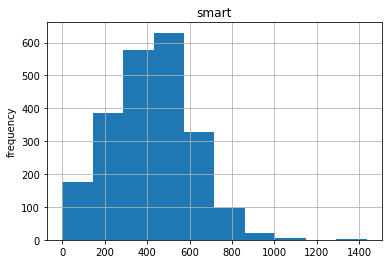

In [48]:
plt.title('smart')
plt.ylabel('frequency')
df_smart['mins_per_month'].hist();

Распределение по количеству потраченных минут по всем месяцам для двух тарифов:

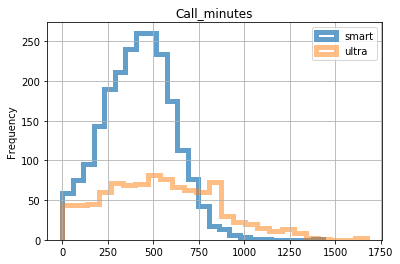

In [49]:
ax = df_smart.plot(kind='hist', y='mins_per_month', histtype='step', bins=25, linewidth=5, alpha=0.7, label='smart')
df_ultra.plot(kind='hist', y='mins_per_month', histtype='step', bins=25,
linewidth=5, alpha=0.5, label='ultra', ax=ax, grid=True, legend=True)
plt.title('Call_minutes');

Распределения для каждого месяца в отдельности:

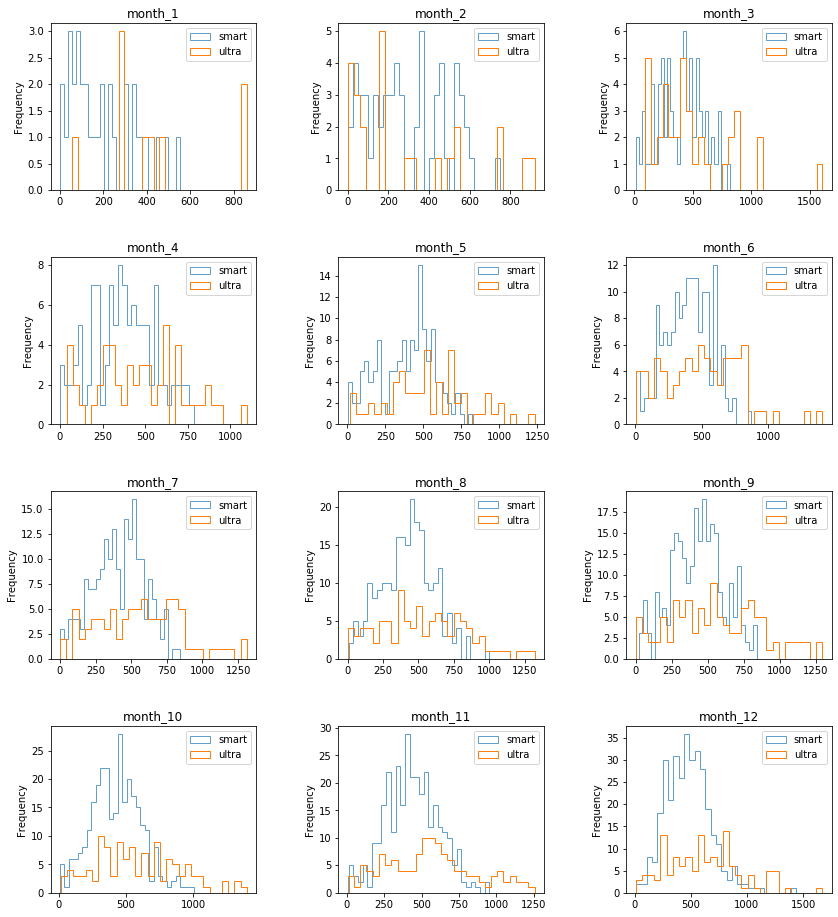

In [50]:
def draw_2hist(col='mins_per_month', nrows=4, ncols=3):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14,16))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  #intervals between subplots
    
    n = 1
    for i in range(nrows):
        for j in range(ncols):
            ax[i, j].hist(df_smart.loc[n, col], histtype='step', alpha=0.7, bins=30, label='smart')
            ax[i, j].hist(df_ultra.loc[n, col], histtype='step', bins=30, label='ultra')
            ax[i, j].set(title='month_' + str(n), ylabel='Frequency')
            ax[i, j].legend()
            n += 1
            
draw_2hist('mins_per_month')

Графики распределений минут по месяцам выглядят странно, а вот из общего графика видно, что и в тарифе смарт, и в тарифе ультра количество сообщений распределено нормально с положительной скошенностью.

Рассмотрим частотность отправки сообщений среди двух групп:

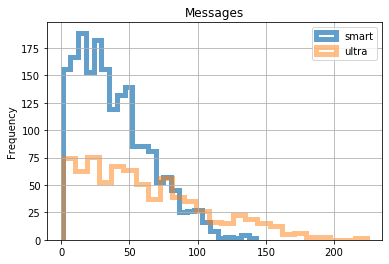

In [51]:
ax = df_smart.plot(kind='hist', y='messages_per_month', histtype='step', bins=25, linewidth=5, alpha=0.7, label='smart')
df_ultra.plot(kind='hist', y='messages_per_month', histtype='step', bins=25,
linewidth=5, alpha=0.5, label='ultra', ax=ax, grid=True, legend=True)
plt.title('Messages');

А так же для каждого месяца в частности:

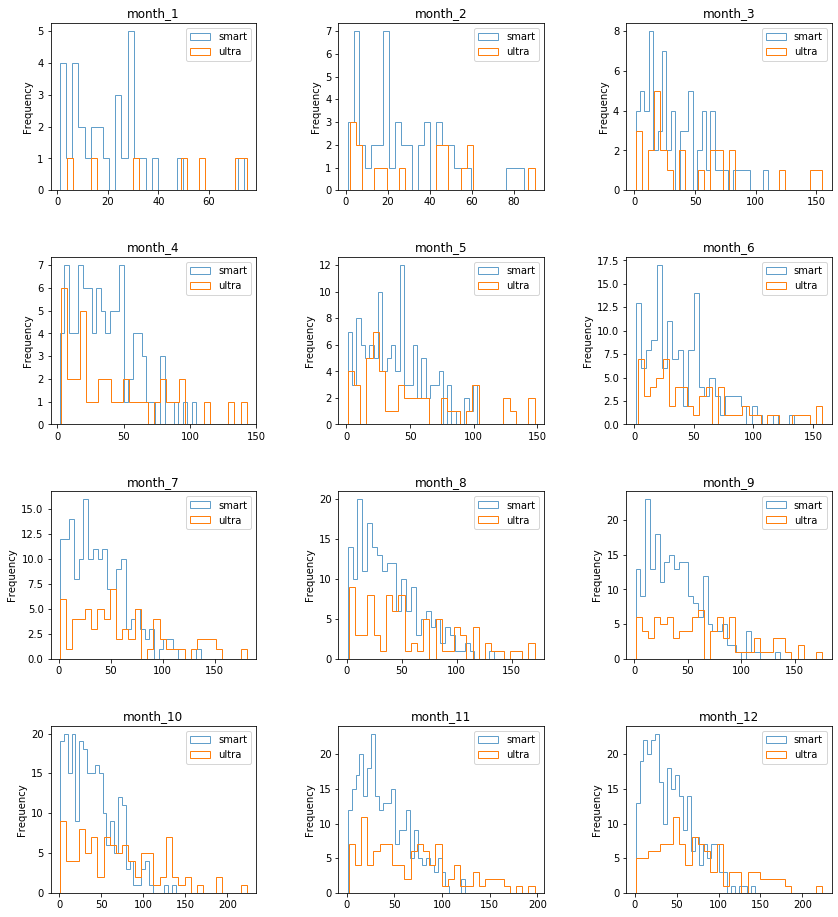

In [52]:
draw_2hist('messages_per_month')

На графиках видно более явно выраженная положительная скошенность распределения(хвост с небольшими частотностями на больших количествах сообщений)

Посмотрим на количество потраченных гигабайт среди двух групп:

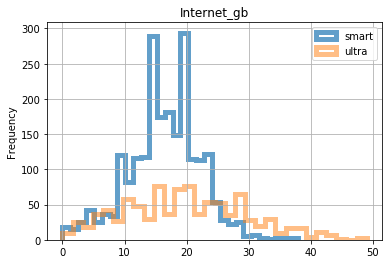

In [53]:
ax = df_smart.plot(kind='hist', y='gb_per_month', histtype='step', bins=30, linewidth=5, alpha=0.7, label='smart')
df_ultra.plot(kind='hist', y='gb_per_month', histtype='step', bins=30,
linewidth=5, alpha=0.5, label='ultra', ax=ax, grid=True, legend=True)
plt.title('Internet_gb');

В тарифе смарт заметны пики по частотности значений в 15 и 20 гигабайт (ограничение без доплаты - тоже 15 гб)

Гистограмма для тарифа "Ультра" более пологая - наибольшая частота: 75.  
Тогда как для тарифа "Смарт" частотность достигает 300 единиц.
Можно сделать вывод, что наибольшее потребление интернет-трафика для тарифа "Смарт" имеет меньший интервал по гб, чем для тарифа "Ультра".

По каждому месяцу:

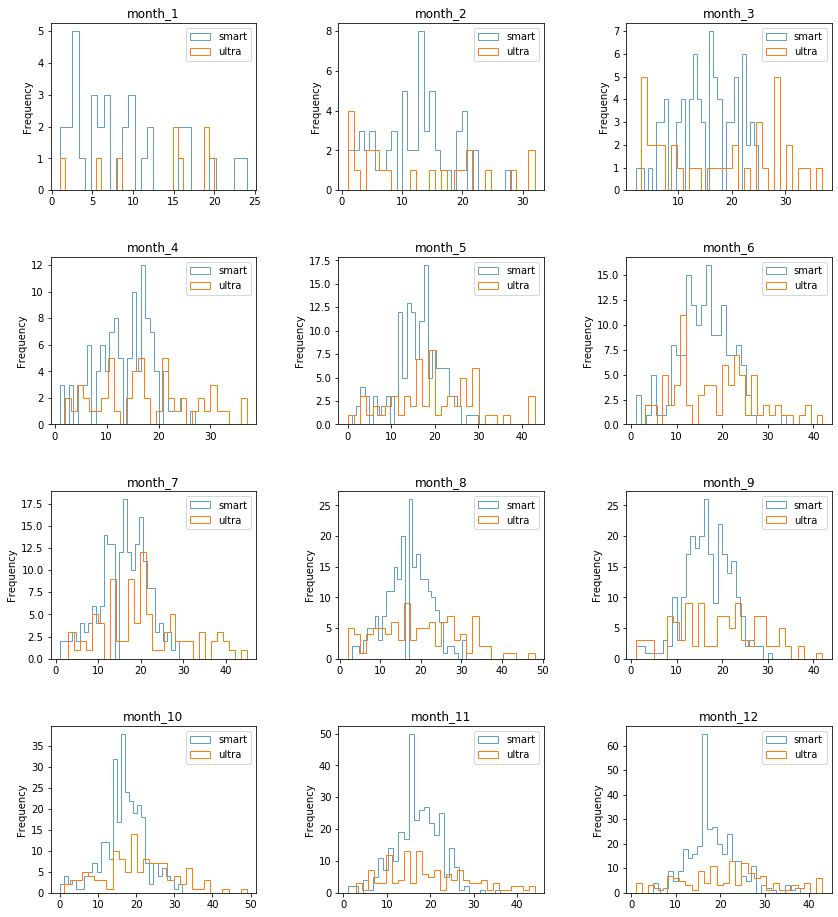

In [54]:
draw_2hist('gb_per_month')

### Вывод

Разброс данных для двух тарифов сильно отличается: в тарифе "ультра" стандартное отклонение почти в 2 раза больше, чем для тарифа "смарт", причем и по количеству потраченных минут, и сообщений, и гигабайт трафика.  
Однако средние значения находятся близко друг к другу.  
Распределения датасетов по тарифам нормальные (t-распределения Стьюдента с большой степенью свободы) для каждой категории с некоторой положительной скошенностью.

## Проверка гипотез

**Проверим две гипотезы:**
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


### Гипотеза 1

Поставим следующую нулевую гипотезу: средняя выручка тарифов "Ультра" и "Смарт" равны. Тогда альтернативной гипотезой будет считаться, что они различаются.

Тогда для двух генеральных совокупностей (в предположении, что выборки независимы).  
Воспользуемся критерием Стьюдента (так как нулевая гипотеза на равенство средниз значений, а распределения напоминают нормальные):

In [55]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(df_smart['income'], df_ultra['income'], equal_var=False)
#в нашем случае дисперсии отличаются почти в 2 раза

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-value: 3.155173205867294e-245
Отвергаем нулевую гипотезу


Так как p-value очень близко к 0, то есть веские основания полагать, что прибыль от двух тарифов не равна между собой.

In [56]:
df_smart['income'].mean()

1290.8911381016644

In [57]:
df_ultra['income'].mean()

2070.9779179810726

### Гипотеза 2

Поставим еще одну нулевую гипотезу: выручка от пользователей в Москве такая же, как и в других регионах. В данном случае также будем считать выборки независимыми, проведем t-test с учетом этого:

In [58]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    df.query('city == "Москва"')['income'], df.query('city != "Москва"')['income'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-value: 0.4619932225305272
Не получилось отвергнуть нулевую гипотезу


У нас недостаточно оснований полагать, что выручка в Москве и регионах разная, однако и полагать, что средняя выручка совпадает также не можем.

In [59]:
df.query('city == "Москва"')['income'].mean()

1546.0524590163934

In [60]:
df.query('city != "Москва"')['income'].mean()

1519.5237909516381

## Вывод:

Видно, что пользователей тарифа "Смарт" в два раза больше пользователей тарифа "Ультра", однако средний доход от пользователей тарифа "Ультра" сильно больше, чем от пользователей тарифа "Смарт".  
Также было выяснено, что нет явной разницы между доходностью пользователей Москвы и других регионов.

   
Если учесть количество пользователей каждого из тарифов, то общая выручка для всех пользователей тарифа "Смарт" будет примерно в полтора раза больше, чем с пользователей тарифа "Ультра": 1290*351 = 452790 руб и 2070*149 = 308430 руб соответственно.  
Пользователи тарифа "Смарт" имеют сильно меньший разброс по количеству потраченных минут, гигабайт и сообщений, чем пользователи тарифа "Ультра".


## Чек-лист готовности проекта

- [x]  открыт файл
- [x]  файлы изучены
- [x]  данные приведены к нужным типам
- [x]  исправлены ошибки в данных
-  для каждого пользователя посчитано:
    - [x] количество сделанных звонков и израсходованных минут разговора по месяцам;
    - [x] количество отправленных сообщений по месяцам
    - [x] объем израсходованного интернет-трафика по месяцам;
    - [x] помесячную выручку с каждого пользователя
-  проанализировано сколько требуется пользователям каждого тарифа в месяц:
    - [x] минут разговора
    - [x] сообщений
    - [x] какой объём интернет-трафика 
- [x]  посчитано среднее количество, дисперсия и стандартное отклонение
- [x]  гистограммы построены, распределение описано
-  проверены гипотезы:
    - [x] средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    - [x] средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
- [x]  задано пороговое alpha
- пояснено:
    - [x] как вы формулировались нулевая и альтернативная гипотезы
    - [x] какой критерий использовался для проверки гипотез и почему
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод